In [1]:
#Ignore warnings
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
#Import the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('update_temperature.csv')
display(df.head(10))

,Year,Country,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
0,2000,United States,13.5,20.2,0,715,282500000,6.2,38,33.1
1,2000,China,12.8,2.7,0,645,1267000000,16.5,24,18.8
2,2000,Germany,9.3,10.1,0,700,82200000,6.6,12,31.8
3,2000,Brazil,24.9,1.9,0,1760,175000000,83.7,18,65.4
4,2000,Australia,21.7,17.2,0,534,19200000,8.8,11,16.2
5,2000,India,24.5,0.8,0,1083,1057000000,17.5,27,22.7
6,2000,Nigeria,27.2,0.6,0,1150,122300000,82.5,15,14.8
7,2000,Russia,5.1,10.6,0,460,146600000,15.3,19,49.4
8,2005,United States,13.6,19.6,10,755,296400000,6.7,39,33.0
9,2005,China,13.0,4.5,10,672,1308000000,16.1,29,19.2


Index(['Year', 'Country', 'Avg_Temperature_degC',
       'CO2_Emissions_tons_per_capita', 'Sea_Level_Rise_mm', 'Rainfall_mm',
       'Population', 'Renewable_Energy_pct', 'Extreme_Weather_Events',
       'Forest_Area_pct'],
      dtype='object')


In [4]:
# Show all fully duplicated rows
duplicates = df[df.duplicated()]
display(duplicates)

,Year,Country,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct


## Changes in the Earth's Population overtime.

This data visualization is being used to look at the differences in the population of the earth over time because it would be interesting to provide this information as an introduction to the dataset. Also, humans and the Earth live in tandem with one another, and they take a lot of the earth's resources, and it would be interesting to see how earth has helped humans thrive over time. The top 5 countries populations are used in the data set due to the way the data set was done, where only the data only has data for every 5 years, and these are the countries that have the most populations, so seeing their changes over time would be interesting.

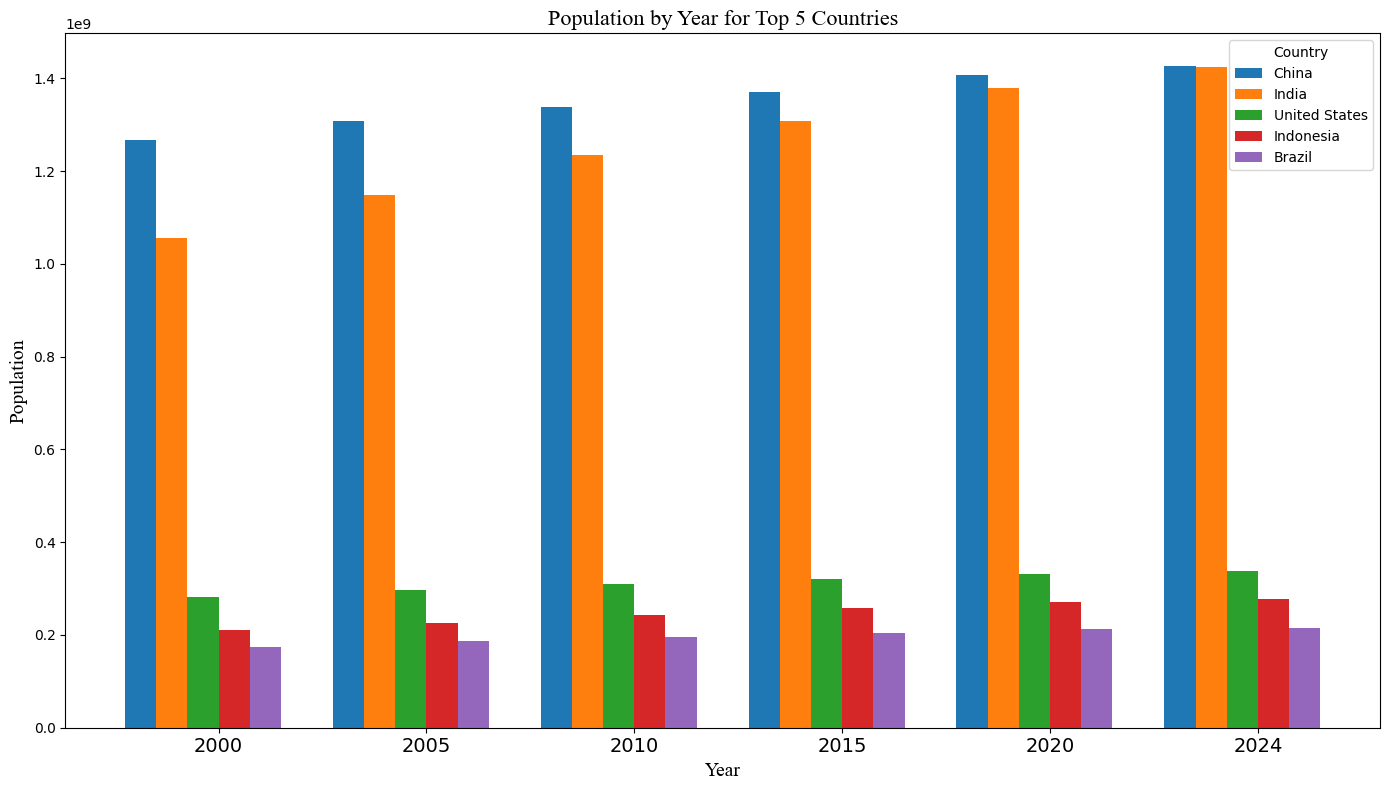

In [5]:
#Convert the year of the dataset to a string so that you can it can be used as a label and category
df['Year'] = df['Year'].astype(str)

#Define the top countries in terms of population
top5Countries = ['China', 'India', 'United States', 'Indonesia', 'Brazil']

#Find the top 5 countries in the original dataset to plot the population
dfTop5 = df[df['Country'].isin(top5Countries)]

#Create an array with the countries and years
years = sorted(dfTop5['Year'].unique())
countries = top5Countries

#Variables needed for the width and the x-axis
barWidth = 0.15
x = range(len(years))

#Create the plot
fig = plt.figure(figsize=(14, 8))

#Create the bar plots
for i, country in enumerate(countries):
    countryData = dfTop5[dfTop5['Country'] == country] #find the country
    countryPop = [countryData[countryData['Year'] == year]['Population'].values[0] #Load its population
                  #Go through each year nat if year not there make population zero
                   if not countryData[countryData['Year'] == year].empty else 0 
                   for year in years]
    barPositions = [pos + i * barWidth for pos in x]
    plt.bar(barPositions, countryPop, width=barWidth, label=country)

#Center the bars
midBarPositions = [pos + (barWidth * len(countries)) / 2 for pos in x]
plt.xticks(midBarPositions, years, fontsize=14)

#Fix up the plot
plt.xlabel('Year',fontname='Times New Roman',fontsize=14)
plt.ylabel('Population', fontname='Times New Roman',fontsize=14)
plt.title('Population by Year for Top 5 Countries', fontname='Times New Roman',fontsize=16)
plt.legend(title='Country')
plt.tight_layout()
#Save the figure
fig.savefig('VicenteGarcia_PopulationbyYearforTop5CountriesBarChart.png')
plt.show()


### Observations
This plot is designed to show the way that countries' populations are steadily increasing, highlighting the top countries due to them having more inhabitants to watch over. Looking at this graph, you can see how China and India are way ahead of the rest when it comes to population; the only other country that comes close is the USA. India also seems to have rapidly grown in terms of population at a rapid pace, while other countries seem to have had a steady increase in population. The United States and Brazil also seem to have had the least noticeable increase in population, as it looks like it has almost stayed the same, while in other countries you can clearly see the increase in their population over the years.

## How Population Affects The Amount of CO2 Emissions

This data visualization is done to show if the amount of population in a country has any correlation with the number of people living in a country due to CO2 emissions having many causes that are not only involving humans. The data points are also color coded based on the country because it is interesting to see if this clustering of data could also be a regional issue.

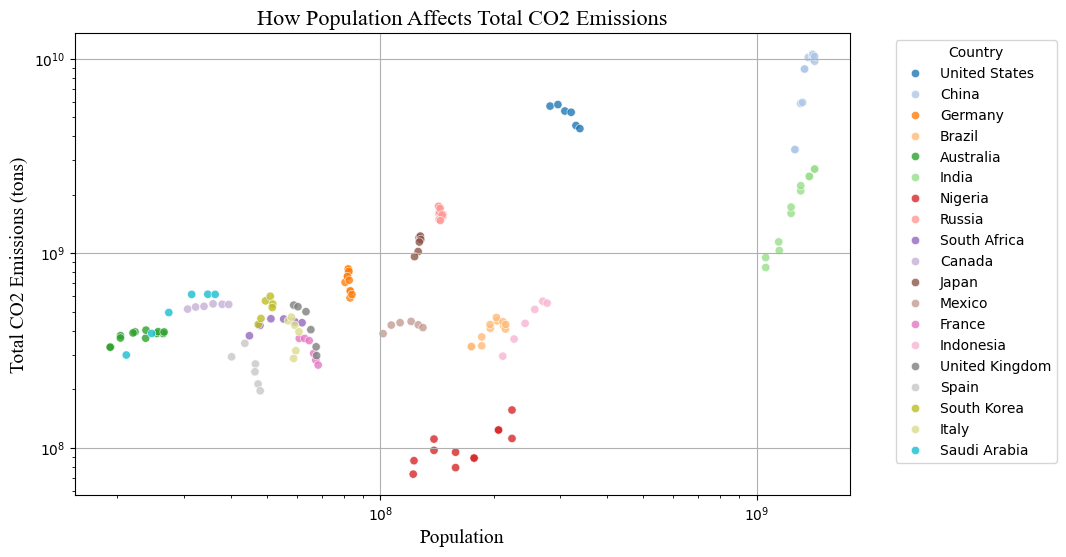

In [6]:
#Calculate the total CO2 emissions per person
df['Total_CO2_Emissions'] = df['Population'] * df['CO2_Emissions_tons_per_capita']

#Make scatterplot with color coding by country
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Population', y='Total_CO2_Emissions', hue='Country', palette='tab20', alpha=0.8)

# Add titles and labels
plt.title('How Population Affects Total CO2 Emissions', fontname='Times New Roman', fontsize=16)
plt.xlabel('Population', fontname='Times New Roman', fontsize=14)
plt.ylabel('Total CO2 Emissions (tons)', fontname='Times New Roman', fontsize=14)
#Scale the graph
plt.xscale('log')
plt.yscale('log')
#Move legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
# Save the figure
fig.savefig('VicenteGarcia_HowPopulationAffectsTotalCO2EmissionsScatterPlot.png', bbox_inches='tight') #With the legend
plt.grid(True)
plt.show()

### Observations

This scatter plot's clustering gives some interesting insights, for example, how the United States' CO₂ emissions are seeming to decrease as its population is increasing. It also does seem like the population of a country has an effect on its CO₂ emissions because there are countries like China, India, Indonesia, Nigeria, etc., where, as their population increases, the amount of CO₂ emissions they cause also seems to increase. There is another interesting thing to note, which is that the population of a country does not seem to be the cause behind their CO₂ emissions because there are countries that have a lower population than others but still have high CO₂ emissions. Also, it is interesting to see how the United States has a much lower population than India, as previously seen, but still manages higher CO₂ emissions.

## How Population Affects Forest area percentage

This data visualization is done to see the relationship between the population of a country and the amount of forest area due to humans needing actual space in an area to live in and using many resources of a forest for the area for many different things in everyday life.

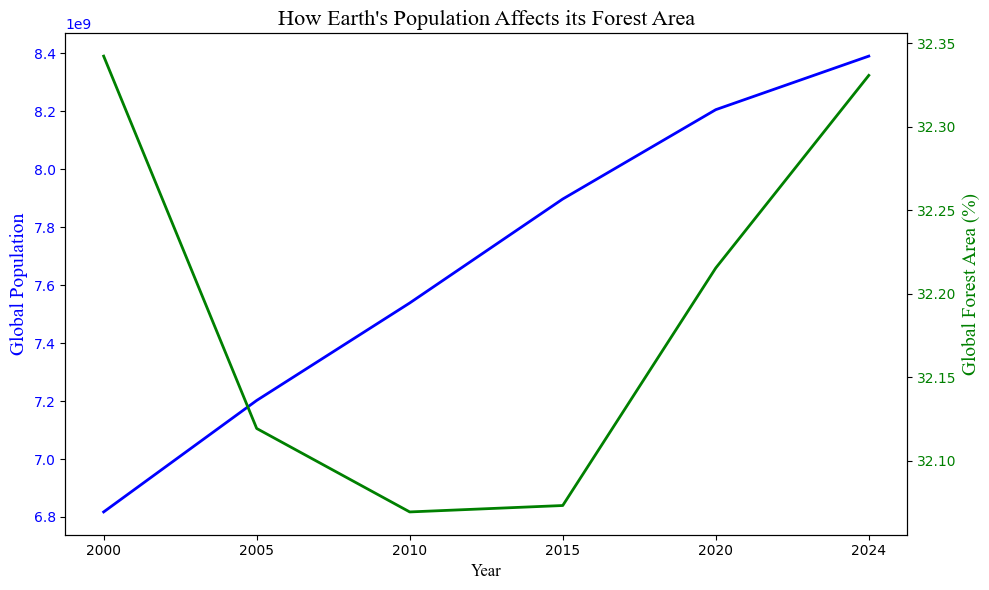

In [7]:
#Create two datasets for the sum of the populations and forest area percentage for each country for every year 
globalPopulation = df.groupby('Year')['Population'].sum().reset_index()
globalForestArea = df.groupby('Year')['Forest_Area_pct'].mean().reset_index()

#Megre the data by the year for each set
mergeData = pd.merge(globalPopulation, globalForestArea, on='Year')

#Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

#Plot Global Population on the left y axis
sns.lineplot(data=mergeData, x='Year', y='Population', ax=ax1, color='blue', linewidth=2)
ax1.set_xlabel('Year', fontname='Times New Roman',fontsize=12)
ax1.set_ylabel('Global Population', color='blue', fontname='Times New Roman',fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')

#Plot the Forest Area percent on the right y-axis
ax2 = ax1.twinx() #Plotted oin the same plot  
sns.lineplot(data=mergeData, x='Year', y='Forest_Area_pct', ax=ax2, color='green', linewidth=2)
ax2.set_ylabel('Global Forest Area (%)', color='green', fontname='Times New Roman',fontsize=14)
ax2.tick_params(axis='y', labelcolor='green')

#Fix up the plot
plt.title("How Earth's Population Affects its Forest Area",  fontname='Times New Roman',fontsize=16)
plt.tight_layout()
#Save the figure
fig.savefig('VicenteGarcia_HowEarthsPopulationAffectsitsForestAreaLinePlot.png')
plt.show()


### Observations

Some insights that this graph could be useful to take note of are that the global percentage of the forest population does not seem to change much throughout the years and stays in a set range. Also, there seems to be a dip in the percentage of the forest population between 2005 and 2015, which could be due to the overpopulation of the country increasing during that time, which could have been the cause of humans needing to occupy more land and resources that the forest acquired. An increase in the population of the forest percentage is also something positive to note due to the overall population of the earth still increasing, showing that humans could be doing something for the earth to help combat the harm they have done.